# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

## 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

In [0]:
def prob_drug_use(prior_belief, f_pos, t_pos):
  p_user = prior_belief
  p_nonuser = 1 - p_user
  p_pos_user = t_pos
  p_pos_nonuser = f_pos
  posterior_probability = ((p_pos_user*p_user) / 
                           ((p_pos_user*p_user) + (p_pos_nonuser*p_nonuser)))
  return posterior_probability

8% false positive rate

100% true positive rate

prior belief is 1/1000


In [0]:
f_pos = .08
t_pos = 1
prior_belief = .001

 - What is the probability that a person is drunk after one positive breathalyzer test?

In [11]:
prob_drug_use(prior_belief, f_pos, t_pos)

0.012357884330202669

- What is the probability that a person is drunk after two positive breathalyzer tests?

In [12]:
new_prior = prob_drug_use(prior_belief, f_pos, t_pos)
prob_drug_use(new_prior, f_pos, t_pos)

0.13525210993291495

In [0]:
print(prob_drunk_given_positive(prob_drunk_given_positive(1 / 1000, .08), .08))

- How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [14]:
count = 0
result_prob = prior_belief

while result_prob < .95:
  count += 1
  result_prob = prob_drug_use(result_prob, f_pos, t_pos)

print(f'After {count} tests, the probability of drunkenness is {result_prob*100:.2f}%.')

After 4 tests, the probability of drunkenness is 96.07%.


## 2) Explore `scipy.stats.bayes_mvs`  

In [0]:
from scipy import stats

In [16]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [18]:
!pip install Fortuna

     |████████████████████████████████| 194kB 9.5MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
  Created wheel for Fortuna: filename=Fortuna-3.16.5-cp36-cp36m-linux_x86_64.whl size=513431 sha256=3223eef172fd6e400975974b1f69133df68af29eb8782ce97a6692f85569c8b5
  Stored in directory: /root/.cache/pip/wheels/c4/6d/64/834652f07eccd46f1ec1f8f2ace4e552da3e6c56ef9e663a21
  Created wheel for MonkeyScope: filename=MonkeyScope-1.2.8-cp36-cp36m-linux_x86_64.whl size=175107 sha256=b6537a20446f976d41e4f754a69cd9bdfc4acbcb08d6d22504dc090f419e2803
  Stored in directory: /root/.cache/pip/wheels/a7/e8/38/cec5b8f20b7cf09f4af1d792b5149f89b9732f39d88e2c70fc
  Created wheel for RNG: filename=RNG-1.6.6-cp36-cp36m-linux_x86_64.whl size=157702 sha256=39425ba46bca5b44fa248c3f0e0948054a8f12b8622c196d57d3835992bf8d14
  Stored in directory: /root/.cache/pip/wheels/a4/85/ec/f1b8b42b421dcc50b8ec

####- Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach.

In [0]:
import Fortuna
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
die_rolls = [Fortuna.random_int(1, 6) for _ in range(100)]

Frequentist Approach:

In [30]:
dice_freq = stats.t.interval(0.95,
                             len(die_rolls),
                             loc = np.mean(die_rolls),
                             scale = stats.sem(die_rolls)
                             )
dice_freq

(3.0721342881842832, 3.7678657118157166)

Bayesian Approach:

In [33]:
dice_bayes = stats.bayes_mvs(die_rolls, alpha=0.95)[0][1]
dice_bayes

(3.0720912544285084, 3.7679087455714915)

Visualized via Seaborn distplot:

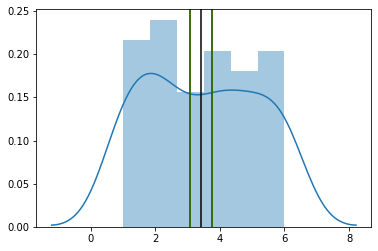

In [43]:
sns.distplot(die_rolls, bins=6)
plt.axvline(x=dice_freq[0], color='red')
plt.axvline(x=dice_freq[1], color='red')
plt.axvline(x=dice_bayes[0], color='green')
plt.axvline(x=dice_bayes[1], color='green')
plt.axvline(x=np.mean(die_rolls), color='k');

A close-up of the left bound of the confidence intervals:

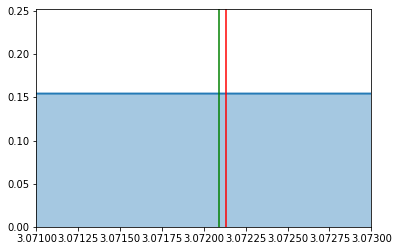

In [47]:
sns.distplot(die_rolls, bins=6)
plt.axvline(x=dice_freq[0], color='red')
plt.axvline(x=dice_freq[1], color='red')
plt.axvline(x=dice_bayes[0], color='green')
plt.axvline(x=dice_bayes[1], color='green')
plt.axvline(x=np.mean(die_rolls), color='k')
plt.xlim(3.071, 3.073);

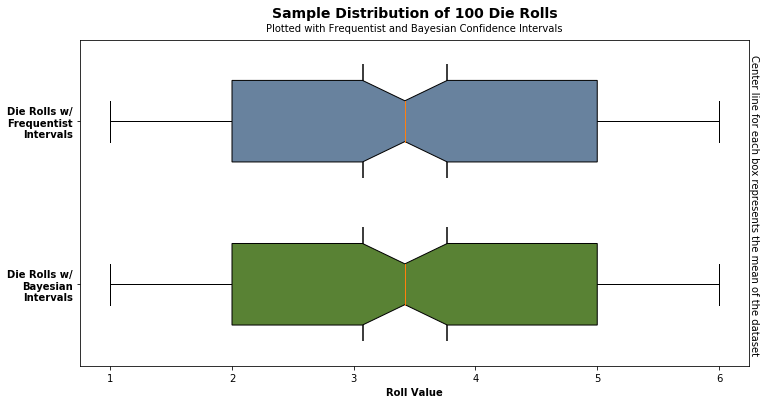

In [177]:
plt.figure(figsize=(12, 6))
box1 = plt.boxplot(die_rolls,
                   positions=[2],
                   vert=False,
                   meanline=True,
                   notch=True,
                   conf_intervals=[dice_freq],
                   usermedians=[np.mean(die_rolls)],
                   patch_artist=True,
                   widths=.5
                   )
box2 = plt.boxplot(die_rolls,
                   positions=[1],
                   vert=False,
                   meanline=True,
                   notch=True,
                   conf_intervals=[dice_bayes],
                   usermedians=[np.mean(die_rolls)],
                   patch_artist=True,
                   widths=.5
                   )
plt.setp(box1["boxes"], facecolor='#68829E')
plt.setp(box2["boxes"], facecolor='#598234')
plt.xlabel('Roll Value', weight='bold')
plt.yticks([1,2],
           labels=['Die Rolls w/\nBayesian\nIntervals', 
                   'Die Rolls w/\nFrequentist\nIntervals'],
           weight='bold'
           )
plt.vlines([dice_bayes], ymin=0.65, ymax=1.35)
plt.vlines([dice_freq], ymin=1.65, ymax=2.35)
plt.title('Sample Distribution of 100 Die Rolls\n', weight='bold', size=14)
plt.text(s='Plotted with Frequentist and Bayesian Confidence Intervals',
         x=2.28, y=2.55
         )
plt.text(s='Center line for each box represents the mean of the dataset',
         x=6.25, y=.58,
         rotation=-90
         );

##3) In your own words, summarize the difference between Bayesian and Frequentist statistics

Bayesian statistics build upon known or calculated prior knowledge combined with testing to estimate how close the result of the test is to the true value.  Repeated tests move the result closer to the true value (within a margin of error).

Frequentist statistics build upon repeated _sampling_ from a population to infer the true value of a given statistic, within a calculated margin of error.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!